### Nuestra fuente de datos es dos: 
#### * banco Santander: https://www.kaggle.com/c/santander-product-recommendation/data 


<font color='green'>  CODE TO IMPORT DATASETS FROM GOOGLE DRIVE </font>


In [120]:
!pip install dask[dataframe] --upgrade

In [121]:
def loadDataFromDrive(dataLink, fileName, sep=','):
  import dask
  import dask.dataframe as dd
  
  # Code to read csv file into Colaboratory:
  !pip install -U -q PyDrive
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials
  # Authenticate and create the PyDrive client:
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  # get the ID from the data link:
  fluff, id_1 = dataLink.split('d/')
  id, fluff = id_1.split('/view') 
  # get the content from the desired remote file
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(fileName+'.csv')  
  
  data_final_obj = dd.read_csv(fileName+'.csv', dtype='object', sep=sep)
  
  return data_final_obj

In [122]:
import pandas as pd 
import numpy as np

Santander dataset

In [123]:
santander_train_ver2_dataLink_ = #'LINK_TO_THE_SANTANDER_DATA_UPLOADED_TO_YOUR_DRIVE'
santander_train_ver2_fileName_ = 'santander_train_ver2.csv'
 
bank_product_rec_santander_whole_df = loadDataFromDrive(santander_train_ver2_dataLink_, santander_train_ver2_fileName_)

In [124]:
bank_product_rec_santander_whole_df = bank_product_rec_santander_whole_df.drop_duplicates(subset=['ncodpers'], keep='last')

In [125]:
bank_product_rec_santander_whole_df = bank_product_rec_santander_whole_df.tail(10000)

In [127]:
bank_product_rec_santander_whole_df.tail(3)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
314693,2016-05-28,1166763,N,ES,H,47,2013-08-14,0,33,1,...,0,0,0,0,0,0,0,0,0,0
314694,2016-05-28,1166789,N,ES,H,22,2013-08-14,0,33,1,...,0,0,0,0,0,0,0,0,0,0
314695,2016-05-28,1550586,N,ES,H,37,2016-05-13,1,0,1,...,0,0,0,0,0,0,0,0,0,0


### Posible esquema origen de fuente de datos:

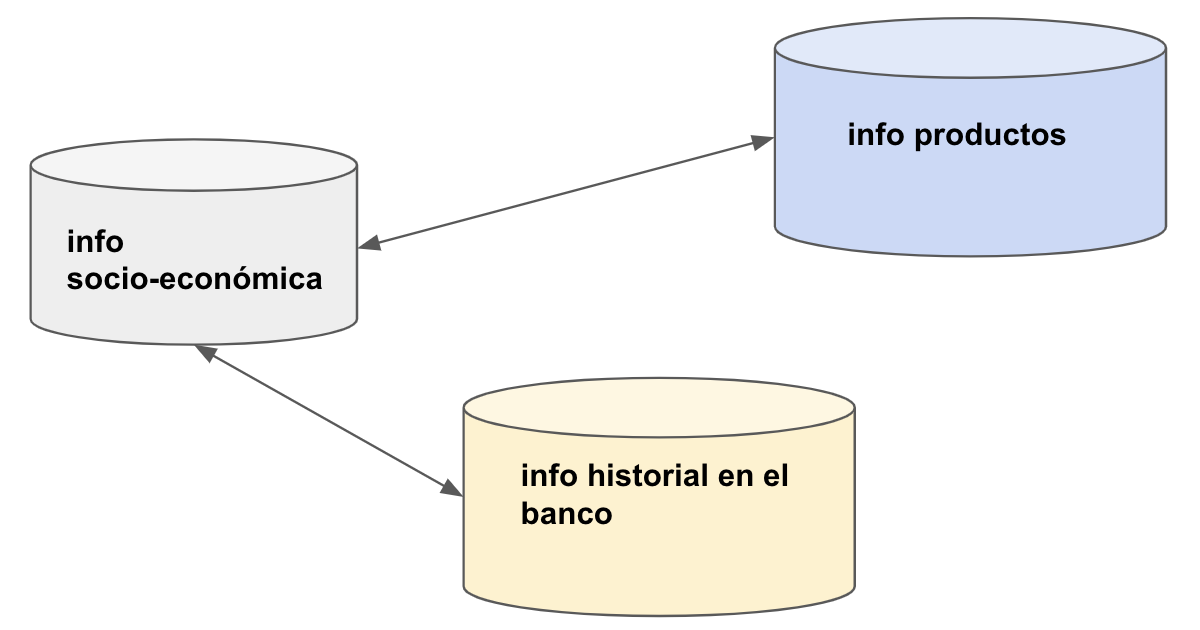

In [159]:
clients_bank_df = bank_product_rec_santander_whole_df[['ncodpers', 'ind_empleado', 'fecha_alta',
                                                       'canal_entrada']]
              
clients_bank_df.tail()

,ncodpers,ind_empleado,fecha_alta,canal_entrada
314691,1166765,N,2013-08-14,KHE
314692,1166764,N,2013-08-14,KHE
314693,1166763,N,2013-08-14,KHE
314694,1166789,N,2013-08-14,KHE
314695,1550586,N,2016-05-13,NaN


# Estudio del atributo renta de clientes: simulación exceso de 0's

In [160]:
clients_socio_eco_df = bank_product_rec_santander_whole_df[['ncodpers', 'cod_prov', 'pais_residencia', 'sexo',	
                                                            'age',	'renta', 'segmento']]
               
clients_socio_eco_df.tail()

,ncodpers,cod_prov,pais_residencia,sexo,age,renta,segmento
314691,1166765,50,ES,V,22,43912.17,03 - UNIVERSITARIO
314692,1166764,26,ES,V,23,23334.99,03 - UNIVERSITARIO
314693,1166763,50,ES,H,47,NaN,02 - PARTICULARES
314694,1166789,50,ES,H,22,199592.82,03 - UNIVERSITARIO
314695,1550586,28,ES,H,37,NaN,NaN


In [161]:
clients_socio_eco_df['renta'] = clients_socio_eco_df.renta.apply(lambda x: 0 if pd.isna(x) else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
clients_socio_eco_df.renta.value_counts()

0                     2209
135522.15000000002       5
75596.04000000001        4
70298.19                 4
83452.29000000001        4
                      ... 
381960.18                1
100982.16                1
121027.59                1
127999.71                1
199592.82                1
Name: renta, Length: 7601, dtype: int64

In [162]:
clients_socio_eco_df['ncodpers'] = clients_socio_eco_df.ncodpers.astype(int)
clients_socio_eco_df['age'] = clients_socio_eco_df.age.astype(int)
clients_socio_eco_df['renta'] = clients_socio_eco_df.renta.apply(lambda x: int(round(float(x), 0)))

clients_socio_eco_df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

ncodpers            int64
cod_prov           object
pais_residencia    object
sexo               object
age                 int64
renta               int64
segmento           object
dtype: object

In [163]:
clients_socio_eco_df = clients_socio_eco_df[clients_socio_eco_df.renta<100000]
len(clients_socio_eco_df)

6969

In [164]:
import plotly.express as px

fig = px.histogram(clients_socio_eco_df, x="renta", nbins=50)
fig.show()

Si queremos añadir esta funcionalidad a nuestro producto interno, añadirlo a una clase que vaya almacenando nuestras funciones como utilidades para todo el equipo:

In [165]:
class Dataplotter():
  """# Germán Cabrera Martínez 2022
     # Author: Germán Cabrera Martínez <germanthro86@gmail.com>
     # Helper class to generate data plots
  """
  def __init__(self, dataframe):
    self.dataframe_ = dataframe

  def plot_as_histogram(self, column_name, nbins_val=50):
    try:
      import plotly.express as px

      fig = px.histogram(self.dataframe_, x=column_name, nbins=nbins_val)
      fig.show()
    
    except Exception as exc:
      print(exc)
      return exc  

In [166]:
cli_soc_eco_plotter = Dataplotter(clients_socio_eco_df)
cli_soc_eco_plotter.plot_as_histogram('renta')

# Estudio de antigüedad de clientes: ejemplo de problema con inliers

In [167]:
dates_to_modify = list(pd.DataFrame(clients_bank_df['fecha_alta'].value_counts()).rename(columns={'fecha_alta': 'contador'}).iloc[:20].index)

def rand_selector(x, dates_to_modify):
  """# Germán Cabrera Martínez 2022
     # Author: Germán Cabrera Martínez <germanthro86@gmail.com>
     # Helper for random selection among certain dates 
  """
  import numpy as np

  if x in dates_to_modify:
    a = [str(x.date()) for x in pd.date_range(start='2012-01-13', end='2017-01-01')]
    return np.random.choice(a, 1)[0]

  else:
    return x

clients_bank_df['fecha_alta_modified'] = clients_bank_df['fecha_alta'].apply(lambda x: rand_selector(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [168]:
clients_bank_df.fecha_alta_modified = clients_bank_df['fecha_alta_modified'].apply(lambda x: pd.to_datetime(x))
clients_bank_df['antig_cliente'] = pd.to_datetime('2022-01-01') - clients_bank_df['fecha_alta_modified']
clients_bank_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ncodpers,ind_empleado,fecha_alta,canal_entrada,fecha_alta_modified,antig_cliente
304696,1155941,N,2013-08-03,KAT,2013-03-07,3222 days
304697,1155940,N,2013-08-03,KAT,2016-03-04,2129 days
304698,1155939,N,2013-08-03,KAT,2016-09-28,1921 days
304699,1155938,N,2013-08-03,KAT,2013-07-01,3106 days
304700,1155937,N,2013-08-03,KAT,2015-10-26,2259 days


In [169]:
def find_inliers_thresold(df, desired_column):
  """# Germán Cabrera Martínez 2022
     # Author: Germán Cabrera Martínez <germanthro86@gmail.com>
     # Helper to detect inliers based on a defined threshold
  """
  try:

    thres_value = int(50 * (len(df[~pd.isna(df[desired_column])]) / len(df[desired_column].unique())))
    
    return thres_value

  except Exception as exc:
    print(exc)
    return exc

In [170]:
clients_bank_df.head()

,ncodpers,ind_empleado,fecha_alta,canal_entrada,fecha_alta_modified,antig_cliente
304696,1155941,N,2013-08-03,KAT,2013-03-07,3222 days
304697,1155940,N,2013-08-03,KAT,2016-03-04,2129 days
304698,1155939,N,2013-08-03,KAT,2016-09-28,1921 days
304699,1155938,N,2013-08-03,KAT,2013-07-01,3106 days
304700,1155937,N,2013-08-03,KAT,2015-10-26,2259 days


In [171]:
clients_bank_df['antig_cliente'] = [x.days for x in clients_bank_df['antig_cliente']] 
find_inliers_thresold(clients_bank_df, 'antig_cliente')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



276

## Simulación error encontrado en caso real:

In [172]:
clients_fec_alta_to_adapt_list = list(pd.DataFrame(clients_bank_df['antig_cliente'].value_counts()).tail(100)['antig_cliente'].index)
clients_bank_df['antig_cliente'] = clients_bank_df['antig_cliente'].apply(lambda x: 3060 if x in clients_fec_alta_to_adapt_list else x)
pd.DataFrame(clients_bank_df['antig_cliente'].value_counts()).head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,antig_cliente
3060,346
3055,196
3054,167
3043,142
2041,14


## antig cliente **en meses**

In [173]:
clients_bank_df.antig_cliente = clients_bank_df.antig_cliente.apply(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [176]:
clients_bank_df['antig_cliente_months'] = clients_bank_df['antig_cliente'].apply(lambda x: int(int(x)/30) if pd.notna(x) else x)
clients_bank_df.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ncodpers,ind_empleado,fecha_alta,canal_entrada,fecha_alta_modified,antig_cliente,antig_cliente_months
304696,1155941,N,2013-08-03,KAT,2013-03-07,3222,107
304697,1155940,N,2013-08-03,KAT,2016-03-04,2129,70
304698,1155939,N,2013-08-03,KAT,2016-09-28,3060,102


In [177]:
find_inliers_thresold(clients_bank_df, 'antig_cliente_months')

8064

In [178]:
import plotly.express as px

inliers_thres = find_inliers_thresold(clients_bank_df, 'antig_cliente_months')
fig = px.histogram(clients_bank_df, x="antig_cliente_months", nbins=int(len(clients_bank_df['antig_cliente_months'].unique())/2)) 
fig.add_hline(y=find_inliers_thresold(clients_bank_df, 'antig_cliente_months')) 
fig.update_yaxes(range=[0, inliers_thres+1000])
fig.show()

## antig cliente **en días**

In [179]:
import plotly.express as px

clients_bank_df = clients_bank_df.rename(columns={'antig_cliente': 'antig_cliente_days'})

inliers_thres = find_inliers_thresold(clients_bank_df, 'antig_cliente_days')
fig = px.histogram(clients_bank_df, x="antig_cliente_days", nbins=int(len(clients_bank_df['antig_cliente_days'].unique())/3)) 
fig.add_hline(y=inliers_thres) 
fig.update_yaxes(range=[0, inliers_thres+1000])
fig.show()

In [180]:
class Dataplotter():
  """# Germán Cabrera Martínez 2022
     # Author: Germán Cabrera Martínez <germanthro86@gmail.com>
     # Helper class to generate data plots
  """
  def __init__(self, dataframe):
    self.dataframe_ = dataframe

  def plot_as_histogram(self, column_name, nbins_val=50):
    try:
      import plotly.express as px

      fig = px.histogram(self.dataframe_, x=column_name, nbins=nbins_val)
      fig.show()
    
    except Exception as exc:
      print(exc)
      return exc 

  def find_inliers_thresold(self, desired_column):
    try:

      thres_value = int(50 * (len(self.dataframe_[~pd.isna(self.dataframe_[desired_column]
                                    )]) / len(self.dataframe_[desired_column].unique())))
      
      return thres_value

    except Exception as exc:
      print(exc)
      return exc

  def plot_hist_values_with_inliers_threshold(self, x_column_name="antig_cliente", 
                                              range_from=0, range_to=1500):
    try:
      import plotly.express as px

      inliers_thres = find_inliers_thresold(self.dataframe_, x_column_name)
      fig = px.histogram(self.dataframe_, x=x_column_name, nbins=int(len(self.dataframe_[x_column_name].unique())/3)) 
      fig.add_hline(y=inliers_thres) 
      fig.update_yaxes(range=[range_from, range_to])
      fig.show()

    except Exception as exc:
      print(exc)
      return exc

# Estudio de **accesos a canales**

In [184]:
channels_simul_dataLink_ = #simulados caso real
channels_simul_fileName_ = 'channels_simul.csv'
 
channels_simul_df = loadDataFromDrive(channels_simul_dataLink_, channels_simul_fileName_)

In [185]:
channels_simul_df = channels_simul_df.compute()
channels_simul_df = channels_simul_df.drop(columns=['CANAL_ACCESS_COUNT'])
channels_simul_df.head()

,HOUR,WEEK_DAY_DESC,NEW_CANAL_ACCESS_COUNT
0,18,Lunes,348
1,15,Lunes,95
2,22,Lunes,20
3,19,Lunes,319
4,23,Lunes,11


In [186]:
channels_simul_df['HOUR']=channels_simul_df['HOUR'].astype(int)
channels_simul_df['WEEK_DAY_DESC']=channels_simul_df['WEEK_DAY_DESC'].astype(str)
channels_simul_df['NEW_CANAL_ACCESS_COUNT']=channels_simul_df['NEW_CANAL_ACCESS_COUNT'].astype(int)
channels_simul_df.dtypes

HOUR                       int64
WEEK_DAY_DESC             object
NEW_CANAL_ACCESS_COUNT     int64
dtype: object

In [187]:
def build_hourly_counts_channel_access_heatmap_data(channel_access_sorted_df, counter_column_name='CANAL_ACCESS_COUNT', hour_column_name='HOUR', transpose_data=True):
    """# Germán Cabrera Martínez 2022
     # Author: Germán Cabrera Martínez <germanthro86@gmail.com>
     # Helper function to generate heatmaps
  """
    try:
        channel_data=[]
        channel_access_sorted_df = channel_access_sorted_df.reset_index()
        
        # build the structure the dataframe will have:
        channels_activity_schema_dict = {'WEEK_DAY_DESC': ['Lunes']*24+['Martes']*24+['Miércoles']*24+['Jueves']*24+['Viernes']*24+['Sábado']*24+['Domingo']*24,
                                 hour_column_name: list(range(0, 24))*7}

        channels_activity_schema_df = pd.DataFrame(channels_activity_schema_dict)
        
        channels_activity_schema_df[hour_column_name]=channels_activity_schema_df[hour_column_name].astype(int)
        channel_access_sorted_df[hour_column_name]=channel_access_sorted_df[hour_column_name].astype(int)
        
        merged_client_hourly_counter_df = pd.merge(channels_activity_schema_df, channel_access_sorted_df, on=['WEEK_DAY_DESC', hour_column_name], how='left')
        '''if len(merged_client_hourly_counter_df) != 168:
            raise ValueError('check for the container dataframe which should have 7 days * 24 hours')'''

        merged_client_hourly_counter_df = merged_client_hourly_counter_df.fillna(0)
        merged_client_hourly_counter_df[counter_column_name] = merged_client_hourly_counter_df[counter_column_name].apply(int)

        for dia_semana in list(week_days_desc_dict.values()):
            channel_hourly_counter_vals = merged_client_hourly_counter_df[merged_client_hourly_counter_df.WEEK_DAY_DESC==dia_semana].sort_values(by=[hour_column_name])[counter_column_name]

            channel_data.append(channel_hourly_counter_vals)
          
        if transpose_data:
            channel_data = np.array(channel_data).T.tolist()
            
        return channel_data
    
    except Exception as exc:
        print(exc)
        return exc

def plot_channels_access_smooth_contours_heatmap(channel_data_arrays, x_axis_values, y_axis_values, x_label, y_label, color_scale_desc=None, title=None, color_type=None,
                                                colorscale='RdYlGn', reversescale=True, height=800, width=800, ):
    try:
        import plotly.graph_objects as go

        fig = go.Figure(data=go.Heatmap(
                           z=channel_data_arrays,
                           x=x_axis_values,
                           y=y_axis_values,
                           zsmooth='best',
                           colorscale=colorscale,
                           reversescale=True))

        fig.update_layout(height=800, width=1000, 
                          title=title,
                          yaxis=dict(tickmode='linear', tick0=0, dtick=1),
                          xaxis_showgrid=True, yaxis_showgrid=True)
        fig.update_yaxes(range=[0, 23], dtick=1)

        fig.show()
        
    except Exception as exc:
        print(exc)
        return exc

  

In [188]:
active_hourly_BE_access_df = channels_simul_df.groupby(by=['HOUR', 'WEEK_DAY_DESC']).sum()
data_BE = build_hourly_counts_channel_access_heatmap_data(active_hourly_BE_access_df, 'NEW_CANAL_ACCESS_COUNT')
week_days_desc_dict = {0:'Lunes', 1:'Martes', 2:'Miércoles', 3:'Jueves', 4:'Viernes', 5:'Sábado', 6:'Domingo'}

plot_channels_access_smooth_contours_heatmap(data_BE, y_axis_values = list(range(0, 24)), 
                                             x_axis_values = list(week_days_desc_dict.values()), 
                                             y_label = "Hora del día", x_label = "Día de la semana", 
                                             title='Accesos de usuarios a la plataforma', 
                                             color_type='RdYlGn')  

In [189]:
class Dataplotter():
  """# Germán Cabrera Martínez 2022
     # Author: Germán Cabrera Martínez <germanthro86@gmail.com>
     # Helper class to generate data plots
  """
  def __init__(self, dataframe):
    self.dataframe_ = dataframe

  def plot_as_histogram(self, column_name, nbins_val=50):
    try:
      import plotly.express as px

      fig = px.histogram(self.dataframe_, x=column_name, nbins=nbins_val)
      fig.show()
    
    except Exception as exc:
      print(exc)
      return exc 

  def find_inliers_thresold(self, desired_column):
    try:

      thres_value = int(50 * (len(self.dataframe_[~pd.isna(self.dataframe_[desired_column])]) / len(self.dataframe_[desired_column].unique())))
      
      return thres_value

    except Exception as exc:
      print(exc)
      return exc

  def plot_hist_values_with_inliers_threshold(self, x_column_name="antig_cliente", range_from=0, range_to=1500):
    try:
      import plotly.express as px

      inliers_thres = find_inliers_thresold(self.dataframe_, x_column_name)
      fig = px.histogram(self.dataframe_, x=x_column_name, nbins=int(len(self.dataframe_[x_column_name].unique())/3)) 
      fig.add_hline(y=inliers_thres) 
      fig.update_yaxes(range=[range_from, range_to])
      fig.show()

    except Exception as exc:
      print(exc)
      return exc

# Pandas compare: utilidad para comparar datasets valor a valor

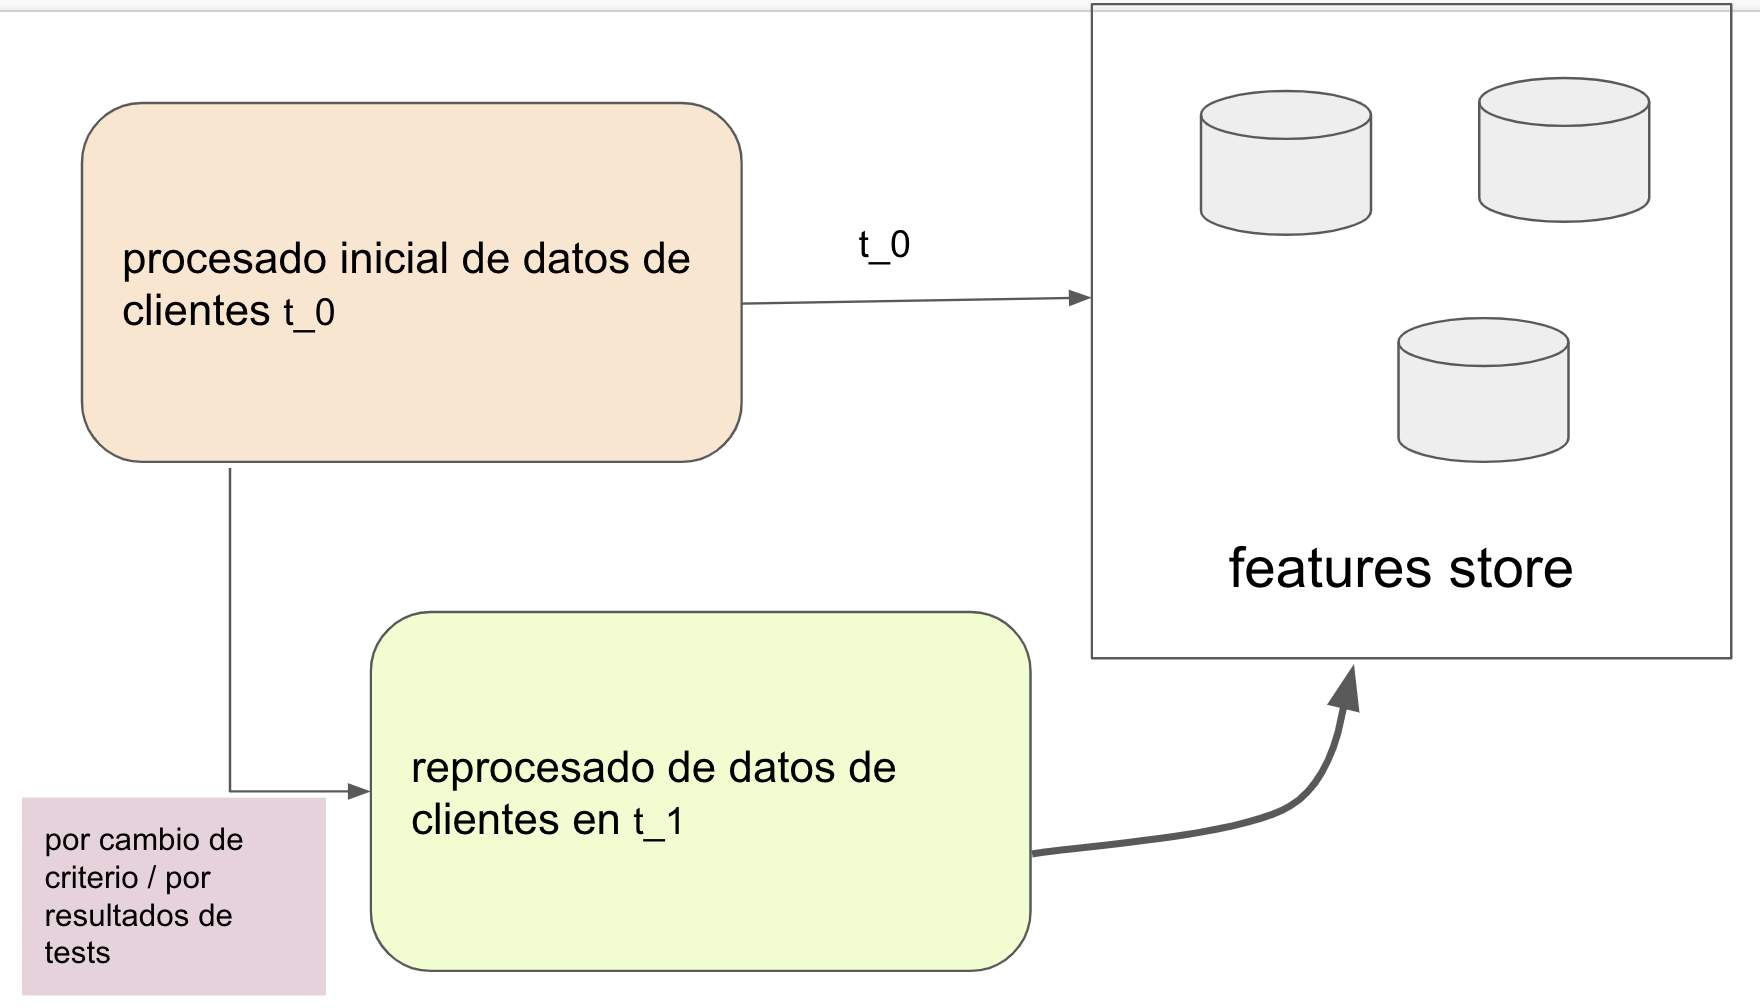

In [191]:
clients_situation_df = pd.DataFrame({'ncodpers': [1155940, 1155921, 1155944, 215590, 1155942], 
                     'MOVIMIENTOS_TARJETA': [0, 15, 63, 23, 6], 
                     'SALDO_EN_CUENTA': [300, 4225, 21, 44556, 2342]})

clients_reprocessed_situation_df = pd.DataFrame({'ncodpers': [1155940, 1155921, 1155944, 215590, 1155942], 
                     'MOVIMIENTOS_TARJETA': [6, 15, 457, 23, 6], 
                     'SALDO_EN_CUENTA': [300, 4225, 500, 44556, 2342]})

clients_situation_df

,ncodpers,MOVIMIENTOS_TARJETA,SALDO_EN_CUENTA
0,1155940,0,300
1,1155921,15,4225
2,1155944,63,21
3,215590,23,44556
4,1155942,6,2342


In [192]:
clients_reprocessed_situation_df

,ncodpers,MOVIMIENTOS_TARJETA,SALDO_EN_CUENTA
0,1155940,6,300
1,1155921,15,4225
2,1155944,457,500
3,215590,23,44556
4,1155942,6,2342


In [193]:
comparisson_df = clients_situation_df.compare(clients_reprocessed_situation_df, keep_shape=True)
comparisson_df

ncodpers       MOVIMIENTOS_TARJETA        SALDO_EN_CUENTA       
      self other                self  other            self  other
0      NaN   NaN                 0.0    6.0             NaN    NaN
1      NaN   NaN                 NaN    NaN             NaN    NaN
2      NaN   NaN                63.0  457.0            21.0  500.0
3      NaN   NaN                 NaN    NaN             NaN    NaN
4      NaN   NaN                 NaN    NaN             NaN    NaN

In [194]:
# filtro para encontrar clientes a reprocesar:
reprocess_rows_idxs = comparisson_df.index[~pd.isna(comparisson_df).all(1)]
reprocess_rows_df = comparisson_df.iloc[reprocess_rows_idxs]
reprocess_rows_df

ncodpers       MOVIMIENTOS_TARJETA        SALDO_EN_CUENTA       
      self other                self  other            self  other
0      NaN   NaN                 0.0    6.0             NaN    NaN
2      NaN   NaN                63.0  457.0            21.0  500.0

# Data drift via Population Stability Index: 
[referencia](https://www.lexjansen.com/wuss/2017/47_Final_Paper_PDF.pdf)

In [195]:
santander_train_ver2_dataLink_ = #'LINK_TO_THE_SANTANDER_DATA_UPLOADED_TO_YOUR_DRIVE'
santander_train_ver2_fileName_ = 'santander_train_ver2.csv'
 
bank_product_rec_santander_whole_df = loadDataFromDrive(santander_train_ver2_dataLink_, santander_train_ver2_fileName_)

bank_product_rec_santander_whole_df = bank_product_rec_santander_whole_df.drop_duplicates(subset=['ncodpers'], keep='last')

In [196]:
clients_sant_df = bank_product_rec_santander_whole_df[['ncodpers', 'pais_residencia', 'age']].sample(frac=0.3)

In [197]:
clients_sant_df = clients_sant_df.compute()

In [199]:
bank_product_rec_santander_whole_df = None

In [200]:
clients_sant_df = clients_sant_df.sort_values(by=['age'], ascending=True)

In [201]:
len(clients_sant_df)

286994

In [202]:
clients_sant_df['age'] = clients_sant_df['age'].apply(lambda x: int(x) if x!=' NA' else None)
clients_sant_df = clients_sant_df.drop(columns=['pais_residencia'])

clients_sant_twenties_df = clients_sant_df[(clients_sant_df.age>=20)&(clients_sant_df.age<29)]
half_clients_sant_twenties_df = clients_sant_twenties_df.sample(frac=0.3)
half_clients_sant_twenties_df['age'] = half_clients_sant_twenties_df['age'].apply(int)

len(half_clients_sant_twenties_df)

29658

In [203]:
clients_sant_no_twenties_df = clients_sant_df[~((clients_sant_df.age>=20)&(clients_sant_df.age<29))]

first_clients_sant_df = pd.concat([clients_sant_no_twenties_df, half_clients_sant_twenties_df])

## Distribución de edades de los clientes a fecha D

In [204]:
data_plotter = Dataplotter(first_clients_sant_df)

data_plotter.plot_as_histogram('age', nbins_val=100)

## Distribución de edades de los clientes a fecha D+n meses

In [205]:
data_plotter = Dataplotter(clients_sant_df)

data_plotter.plot_as_histogram('age', nbins_val=100)

### Hay drift significativo en ese atributo de edad? Check mediante PSI

In [206]:
clients_sant_df.age.unique()

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,  nan,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 116., 164.])

In [207]:
clients_sant_df = clients_sant_df[~pd.isna(clients_sant_df.age)]
clients_sant_df['age'] = clients_sant_df['age'].astype(int)
ages_deciles = np.quantile(clients_sant_df.age.values, q=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ages_deciles = [int(x) for x in ages_deciles]
ages_deciles

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[22, 24, 26, 31, 38, 43, 48, 54, 64, 164]

In [208]:
def count_rows_per_deciles(dataframe, scoring_column_deciles, is_scoring_sample=True):
  """# Germán Cabrera Martínez 2022
     # Author: Germán Cabrera Martínez <germanthro86@gmail.com>
     # Helper function to count number of rows belonging to each decile
  """
  scoring_column_deciles = [int(x) for x in scoring_column_deciles]
  
  counters_dict = {}

  for idx in range(len(scoring_column_deciles)+1):
    if idx == 0:
      counters_dict['<'+str(scoring_column_deciles[0])] = np.round(len(dataframe[(
                                      dataframe.age<scoring_column_deciles[0])])/len(dataframe), 3)
    elif idx==(len(scoring_column_deciles)):
      counters_dict['>'+str(scoring_column_deciles[-1])] = np.round(len(dataframe[(
                                      dataframe.age>=scoring_column_deciles[-1])])/len(dataframe), 3)
    else:
      counters_dict[str(scoring_column_deciles[idx-1])+'-'+str(
                            scoring_column_deciles[idx])] = np.round(len(dataframe[(dataframe.age>=scoring_column_deciles[idx-1])&(
                                              dataframe.age<scoring_column_deciles[idx])]
                                            )/len(dataframe), 3)

  if is_scoring_sample:
    return pd.DataFrame({'Scoring sample range': list(counters_dict.keys()),
             'Scoring Percentage (A)': list(counters_dict.values())})  
  else:
    return pd.DataFrame({'Scoring sample range': list(counters_dict.keys()),
            'Training Percentage (B)': list(counters_dict.values())}) 


clients_sant_df_deciles_ratios = count_rows_per_deciles(clients_sant_df, 'age', ages_deciles)
clients_sant_df_deciles_ratios

,Scoring sample range,Scoring Percentage (A)
0,<22,0.087
1,22-24,0.104
2,24-26,0.096
3,26-31,0.101
4,31-38,0.098
5,38-43,0.100
6,43-48,0.111
7,48-54,0.101
8,54-64,0.098
9,64-164,0.104


In [209]:
round(len(clients_sant_df[clients_sant_df.age<22])/len(clients_sant_df), 2)

0.09

In [210]:
assert clients_sant_df_deciles_ratios['Scoring Percentage (A)'].sum()>0.99, 'check for the values'

In [211]:
first_clients_sant_df_deciles_ratios = count_rows_per_deciles(first_clients_sant_df, 'age', 
                                                              ages_deciles, is_scoring_sample=False)
first_clients_sant_df_deciles_ratios

,Scoring sample range,Training Percentage (B)
0,<22,0.043
1,22-24,0.040
2,24-26,0.038
3,26-31,0.068
4,31-38,0.128
5,38-43,0.131
6,43-48,0.145
7,48-54,0.133
8,54-64,0.128
9,64-164,0.136


In [212]:
first_clients_sant_df_deciles_ratios['Training Percentage (B)'].sum()

0.99

In [213]:
round(len(first_clients_sant_df[first_clients_sant_df.age<22])/len(first_clients_sant_df), 2)

0.04

In [214]:
assert first_clients_sant_df_deciles_ratios['Training Percentage (B)'].sum()>=0.99, 'check for the values'

In [215]:
data_drift_tracker_df = first_clients_sant_df_deciles_ratios.merge(clients_sant_df_deciles_ratios, 
                                                                   on=['Scoring sample range'],
                                                                   how='inner')

data_drift_tracker_df

,Scoring sample range,Training Percentage (B),Scoring Percentage (A)
0,<22,0.043,0.087
1,22-24,0.040,0.104
2,24-26,0.038,0.096
3,26-31,0.068,0.101
4,31-38,0.128,0.098
5,38-43,0.131,0.100
6,43-48,0.145,0.111
7,48-54,0.133,0.101
8,54-64,0.128,0.098
9,64-164,0.136,0.104


In [216]:
data_drift_tracker_df['Scoring Percentage (A)']=data_drift_tracker_df['Scoring Percentage (A)'].apply(lambda x: x*100)
data_drift_tracker_df['Training Percentage (B)']=data_drift_tracker_df['Training Percentage (B)'].apply(lambda x: x*100)
data_drift_tracker_df

,Scoring sample range,Training Percentage (B),Scoring Percentage (A)
0,<22,4.3,8.7
1,22-24,4.0,10.4
2,24-26,3.8,9.6
3,26-31,6.8,10.1
4,31-38,12.8,9.8
5,38-43,13.1,10.0
6,43-48,14.5,11.1
7,48-54,13.3,10.1
8,54-64,12.8,9.8
9,64-164,13.6,10.4


In [217]:
data_drift_tracker_df['A-B'] = data_drift_tracker_df['Scoring Percentage (A)']-data_drift_tracker_df['Training Percentage (B)']
data_drift_tracker_df

,Scoring sample range,Training Percentage (B),Scoring Percentage (A),A-B
0,<22,4.3,8.7,4.4
1,22-24,4.0,10.4,6.4
2,24-26,3.8,9.6,5.8
3,26-31,6.8,10.1,3.3
4,31-38,12.8,9.8,-3.0
5,38-43,13.1,10.0,-3.1
6,43-48,14.5,11.1,-3.4
7,48-54,13.3,10.1,-3.2
8,54-64,12.8,9.8,-3.0
9,64-164,13.6,10.4,-3.2


In [218]:
data_drift_tracker_df['ln(A/B)'] =  np.log((data_drift_tracker_df['Scoring Percentage (A)']/data_drift_tracker_df['Training Percentage (B)']))
data_drift_tracker_df

,Scoring sample range,Training Percentage (B),Scoring Percentage (A),A-B,ln(A/B)
0,<22,4.3,8.7,4.4,0.704708
1,22-24,4.0,10.4,6.4,0.955511
2,24-26,3.8,9.6,5.8,0.926762
3,26-31,6.8,10.1,3.3,0.395613
4,31-38,12.8,9.8,-3.0,-0.267063
5,38-43,13.1,10.0,-3.1,-0.270027
6,43-48,14.5,11.1,-3.4,-0.267204
7,48-54,13.3,10.1,-3.2,-0.275229
8,54-64,12.8,9.8,-3.0,-0.267063
9,64-164,13.6,10.4,-3.2,-0.268264


In [219]:
data_drift_tracker_df['PSI'] = data_drift_tracker_df['A-B'] * data_drift_tracker_df['ln(A/B)']
data_drift_tracker_df

,Scoring sample range,Training Percentage (B),Scoring Percentage (A),A-B,ln(A/B),PSI
0,<22,4.3,8.7,4.4,0.704708,3.100715
1,22-24,4.0,10.4,6.4,0.955511,6.115273
2,24-26,3.8,9.6,5.8,0.926762,5.375220
3,26-31,6.8,10.1,3.3,0.395613,1.305522
4,31-38,12.8,9.8,-3.0,-0.267063,0.801188
5,38-43,13.1,10.0,-3.1,-0.270027,0.837084
6,43-48,14.5,11.1,-3.4,-0.267204,0.908492
7,48-54,13.3,10.1,-3.2,-0.275229,0.880732
8,54-64,12.8,9.8,-3.0,-0.267063,0.801188
9,64-164,13.6,10.4,-3.2,-0.268264,0.858445


In [220]:
round(np.sum(data_drift_tracker_df['PSI'])/100, 3)

0.21

In [ ]:
#CHECK KS TEST

In [221]:
from scipy import stats

stats.ks_2samp(clients_sant_df.age.values, first_clients_sant_df.age.values)

Ks_2sampResult(statistic=0.20796251055868445, pvalue=0.0)

# Data drift monitor multivariable

In [223]:
normal_clients_socio_eco_df = clients_socio_eco_df[~pd.isna(clients_socio_eco_df.renta)]
renta_q1 = np.percentile(normal_clients_socio_eco_df.renta, 25)
renta_q3 = np.percentile(normal_clients_socio_eco_df.renta, 75)

normality_region_mask = (normal_clients_socio_eco_df.renta>renta_q1)&(normal_clients_socio_eco_df.renta<renta_q3)
normal_clients_socio_eco_df = normal_clients_socio_eco_df[normality_region_mask]

len(normal_clients_socio_eco_df)

3017

In [224]:
import plotly.express as px

normal_clients_socio_eco_df['renta'] = normal_clients_socio_eco_df['renta'].apply(lambda x: round(float(x), 1) if ~pd.isna(x) else x)
fig = px.box(normal_clients_socio_eco_df, y="renta")
fig.show()

In [225]:
normal_clients_socio_eco_df = normal_clients_socio_eco_df[['age', 'renta']].iloc[:int(0.85*len(normal_clients_socio_eco_df))]
normal_clients_socio_eco_df.head(10)

,age,renta
304696,22,35420.0
304705,25,52231.0
304707,23,32979.0
304708,22,40282.0
304710,44,23663.0
304714,23,71839.0
304717,22,46487.0
304718,23,54792.0
304722,25,59993.0
304723,23,11095.0


In [226]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

def standard_scaler_transformer(attributes_dataset, columns_to_scale, store_as_pickle=False):  
  try:
      from sklearn.preprocessing import StandardScaler
      import pandas as pd
      from sklearn.pipeline import Pipeline
      import pickle 
      import numpy as np

      scaler = StandardScaler()
      scaler_pipeline = Pipeline([('scaler', scaler)])

      fitted_scaler = scaler_pipeline.fit(attributes_dataset[columns_to_scale])
      if store_as_pickle:
          pickle.dump(fitted_scaler, open("preprocessor_scaler.pickle", "wb"))

      scaled_df_values = fitted_scaler.transform(attributes_dataset[columns_to_scale])
      scaled_df = pd.DataFrame(columns=columns_to_scale,
                                data=scaled_df_values)
      
      return fitted_scaler, scaled_df

  except Exception as exc:
      print(exc)
      return exc

In [227]:
data_scaler, scaled_normal_clients_socio_eco_df = standard_scaler_transformer(normal_clients_socio_eco_df, columns_to_scale=['age', 'renta'])
scaled_normal_clients_socio_eco_df.head(10)

,age,renta
0,-0.548465,-1.189121
1,-0.168975,0.054883
2,-0.421968,-1.369754
3,-0.548465,-0.829336
4,2.234462,-2.059132
5,-0.421968,1.505863
6,-0.548465,-0.370170
7,-0.421968,0.244395
8,-0.168975,0.629266
9,-0.421968,-2.989156


In [228]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(scaled_normal_clients_socio_eco_df)

#evaluate sample:
anomaly_pred = clf.predict(scaled_normal_clients_socio_eco_df.iloc[-10].array.reshape(1, -1))
anomaly_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but OneClassSVM was fitted with feature names



array([1])

### Muestra dentro de la región de "normalidad"

In [232]:
anomaly_pred_prob = clf.decision_function(scaled_normal_clients_socio_eco_df.iloc[-10].array.reshape(1, -1))
anomaly_pred_prob

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but OneClassSVM was fitted with feature names



array([12.55226191])

### Muestra fuera de la región de "normalidad"

In [237]:
novel_example = clients_socio_eco_df[clients_socio_eco_df.renta==clients_socio_eco_df.renta.max()][['age', 'renta']] 
scaled_novel_example = data_scaler.transform(novel_example)

In [238]:
anomaly_pred = clf.predict(scaled_novel_example)
anomaly_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but OneClassSVM was fitted with feature names



array([-1])

In [239]:
anomaly_pred_prob = clf.decision_function(scaled_novel_example)
anomaly_pred_prob

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but OneClassSVM was fitted with feature names



array([-53.39633288])

### ¿Qué características tiene el cliente que el modelo ha detectado como punto novel?

In [240]:
novel_example

,age,renta
312253,23,99990


# Ejemplos simulados de conversaciones en llamadas a asistentes: mal etiquetado a resolver

* Previamente se tienen definidas unas posibles categorías de asuntos en llamadas
* El usuario llama e indica lo que quiere al asistente automático
* En muchas ocasiones se redirige a un agente
* Cuando el agente atiende una llamada, asigna finalmente una categoría según la conversación mantenida con el cliente

In [241]:
import pandas as pd 

calls_dict = {'id': [200, 344, 567, 600, 1042],
               'mensaje_usuario': ['me gustaría abrir una nueva cuenta', 'estado de reclamación', 
                                   'quiero realizar un bizum', 'quiero abrir una nueva cuenta', 
                                   'quiero una cuenta'],
              'asunto': ['CONSULTA CONDICIONES', 'CANCELACIÓN', 'OPERACIÓN BIZUM', 'CAMBIO TITULARIDAD',
                         'APERTURA DE CUENTA']}

pd.DataFrame(calls_dict)

,id,mensaje_usuario,asunto
0,200,me gustaría abrir una nueva cuenta,CONSULTA CONDICIONES
1,344,estado de reclamación,CANCELACIÓN
2,567,quiero realizar un bizum,OPERACIÓN BIZUM
3,600,quiero abrir una nueva cuenta,CAMBIO TITULARIDAD
4,1042,quiero una cuenta,APERTURA DE CUENTA
